# Librerias

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, SpectralClustering, MeanShift, AffinityPropagation, Birch
from sklearn.mixture import GaussianMixture
import numpy as np
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import os
warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected = True)

# Carga de datos

In [ ]:
file_path = '../data/base_prueba_tecnica.xlsx'
df = pd.read_excel(file_path)
df.head()

,ID,Edad,Genero,Ingresos Anuales,Gasto Mensual,Puntuación de Crédito,Región,Comportamiento en linea,Compras en el ultimo año
0,1,21,Masculino,222011,2297,335,Sur,8,81
1,2,26,Masculino,239229,3420,329,Oeste,10,27
2,3,38,Masculino,716278,36965,711,Oeste,9,82
3,4,64,Femenino,697325,9846,855,Sur,2,6
4,5,52,Femenino,1032569,6607,989,Sur,3,2


In [ ]:
scaler = MinMaxScaler()

numeric_columns = ['Edad', 'Ingresos Anuales', 'Gasto Mensual', 'Puntuación de Crédito', 'Comportamiento en linea', 'Compras en el ultimo año']

df_scaled = df.copy()
df_scaled[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Comparación de Modelos de Clustering en 2D
Utilizamos PCA para reducir la dimensionalidad de los datos a dos dimensiones y facilitar la visualización. Luego, aplicamos varios algoritmos de clustering, incluyendo Gaussian Mixture, BIRCH, DBSCAN, Agglomerative Clustering con enlace de Ward, Spectral Clustering, Mean Shift y Affinity Propagation. Visualizamos los clusters resultantes para cada modelo en gráficos 2D para comparar su rendimiento y la formación de clusters.


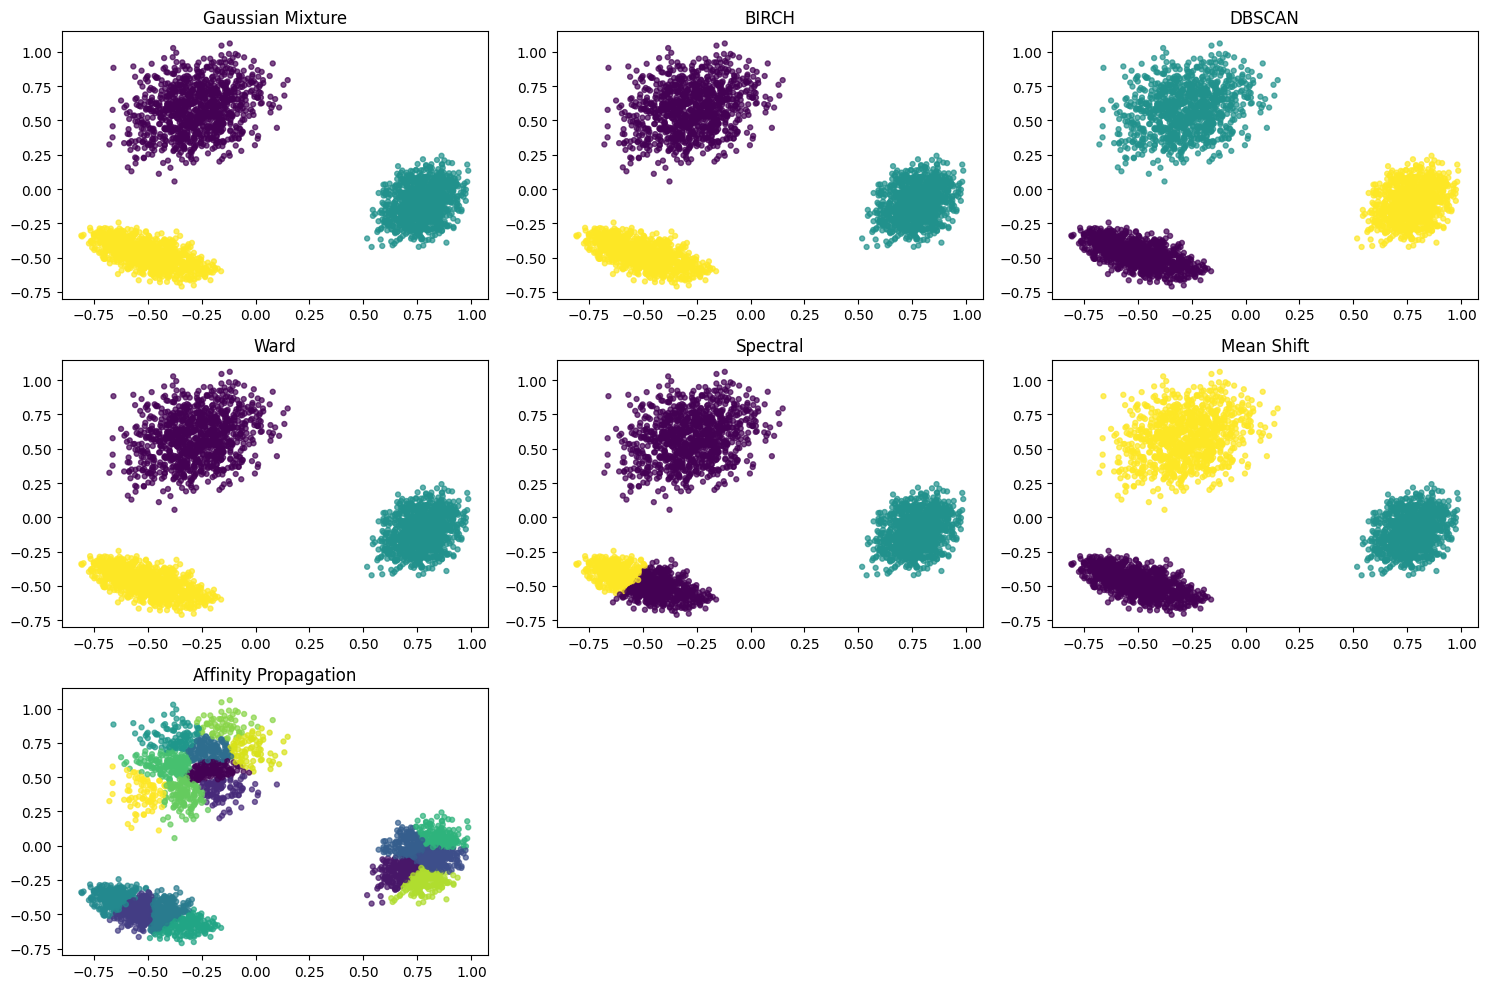

In [ ]:



numeric_columns_no_id = [col for col in numeric_columns if col != 'ID']


pca = PCA(n_components=2)
X_reduced = pca.fit_transform(df_scaled[numeric_columns_no_id])

models = [
    ('Gaussian Mixture', GaussianMixture(n_components=3)),  # Ajustar el n_components según sea necesario
    ('BIRCH', Birch(n_clusters=3)),  # Ajustar el n_clusters según sea necesario
    ('DBSCAN', DBSCAN(eps=0.3, min_samples=10)),  # Ajustar eps y min_samples según sea necesario
    ('Ward', AgglomerativeClustering(n_clusters=3, linkage='ward')),  # Ajustar el n_clusters según sea necesario
    ('Spectral', SpectralClustering(n_clusters=3, affinity='nearest_neighbors', assign_labels='kmeans')),  # Ajustar el n_clusters según sea necesario
    ('Mean Shift', MeanShift(bandwidth=None)),  # MeanShift estima el bandwidth automáticamente
    ('Affinity Propagation', AffinityPropagation(damping=0.9, max_iter=200, convergence_iter=15))  # Ajustar damping, max_iter y convergence_iter según sea necesario
]


plt.figure(figsize=(15, 10))
for i, (name, model) in enumerate(models, 1):
    plt.subplot(3, 3, i)
    if name == 'Gaussian Mixture':
        model.fit(X_reduced)
        labels = model.predict(X_reduced)
    else:
        labels = model.fit_predict(X_reduced)
    
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels, cmap='viridis', marker='.', s=50, alpha=0.7)
    plt.title(name)

plt.tight_layout()
plt.show()


# Comparación de Modelos de Clustering en 3D
Extendemos la visualización a tres dimensiones usando PCA para reducir los datos a tres componentes principales. Repetimos la aplicación de los mismos algoritmos de clustering y visualizamos los resultados en gráficos 3D. 


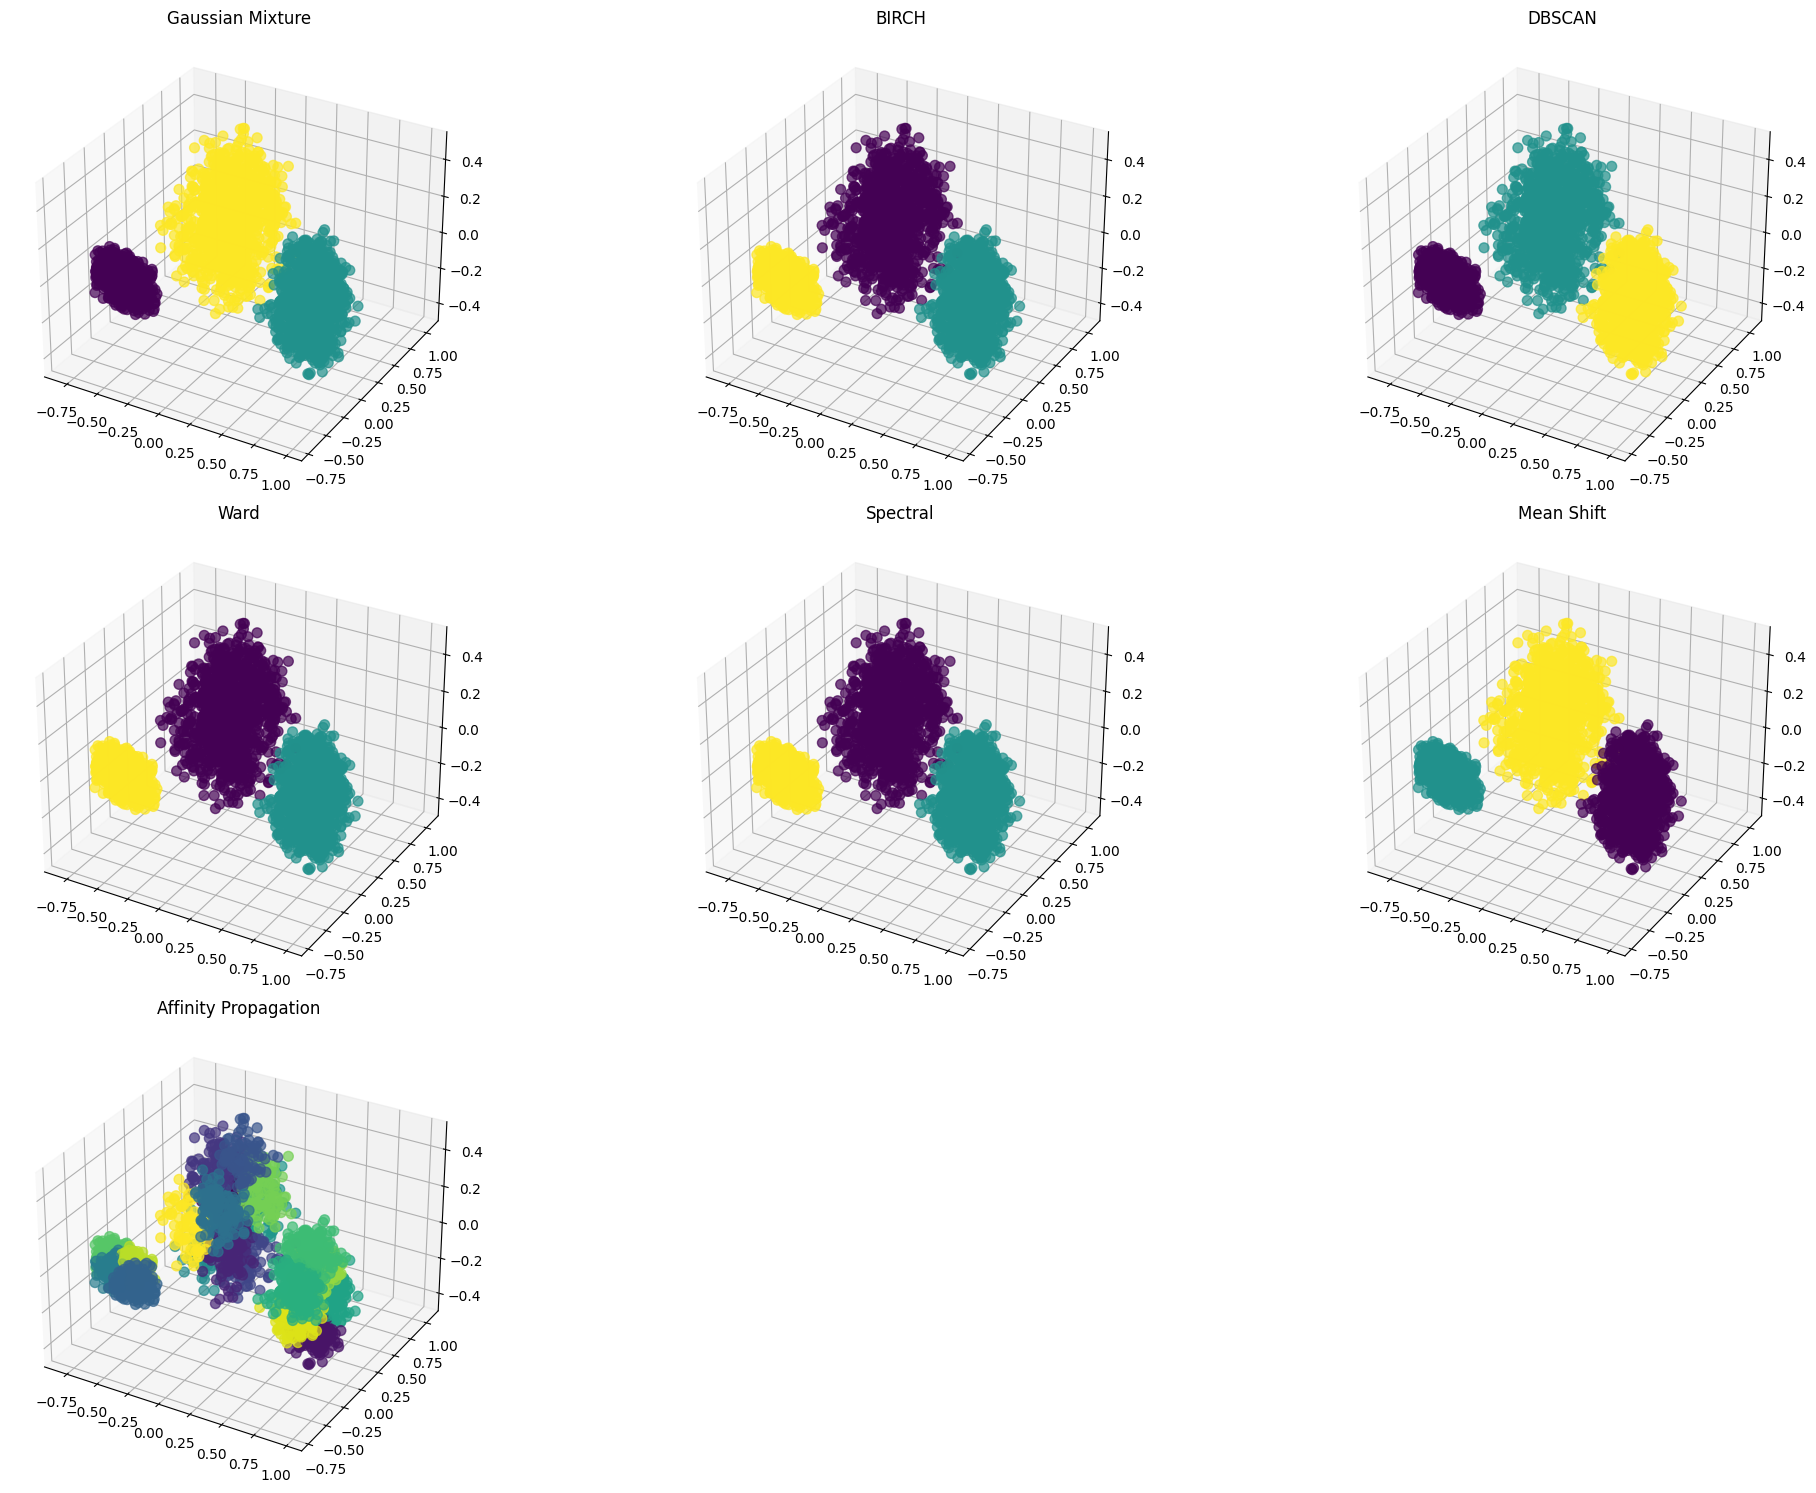

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

pca_3d = PCA(n_components=3)
X_reduced_3d = pca_3d.fit_transform(df_scaled[numeric_columns_no_id])

fig = plt.figure(figsize=(20, 15))
for i, (name, model) in enumerate(models, 1):
    ax = fig.add_subplot(3, 3, i, projection='3d')
    if name == 'Gaussian Mixture':
        model.fit(X_reduced_3d)
        labels = model.predict(X_reduced_3d)
    else:
        labels = model.fit_predict(X_reduced_3d)

    ax.scatter(X_reduced_3d[:, 0], X_reduced_3d[:, 1], X_reduced_3d[:, 2], c=labels, cmap='viridis', marker='o', s=50, alpha=0.7)
    ax.set_title(name)

plt.tight_layout()
plt.show()


# Análisis de Distribución de Clusters
Después de aplicar los modelos de clustering, asignamos las etiquetas resultantes a nuestro DataFrame escalado para cada técnica. Utilizamos `seaborn` para generar boxplots que nos permiten visualizar la distribución de cada característica numérica dentro de los clusters identificados por cada técnica de clustering.

Esta visualización es útil para entender cómo se diferencian los clusters en términos de las características numéricas originales. 


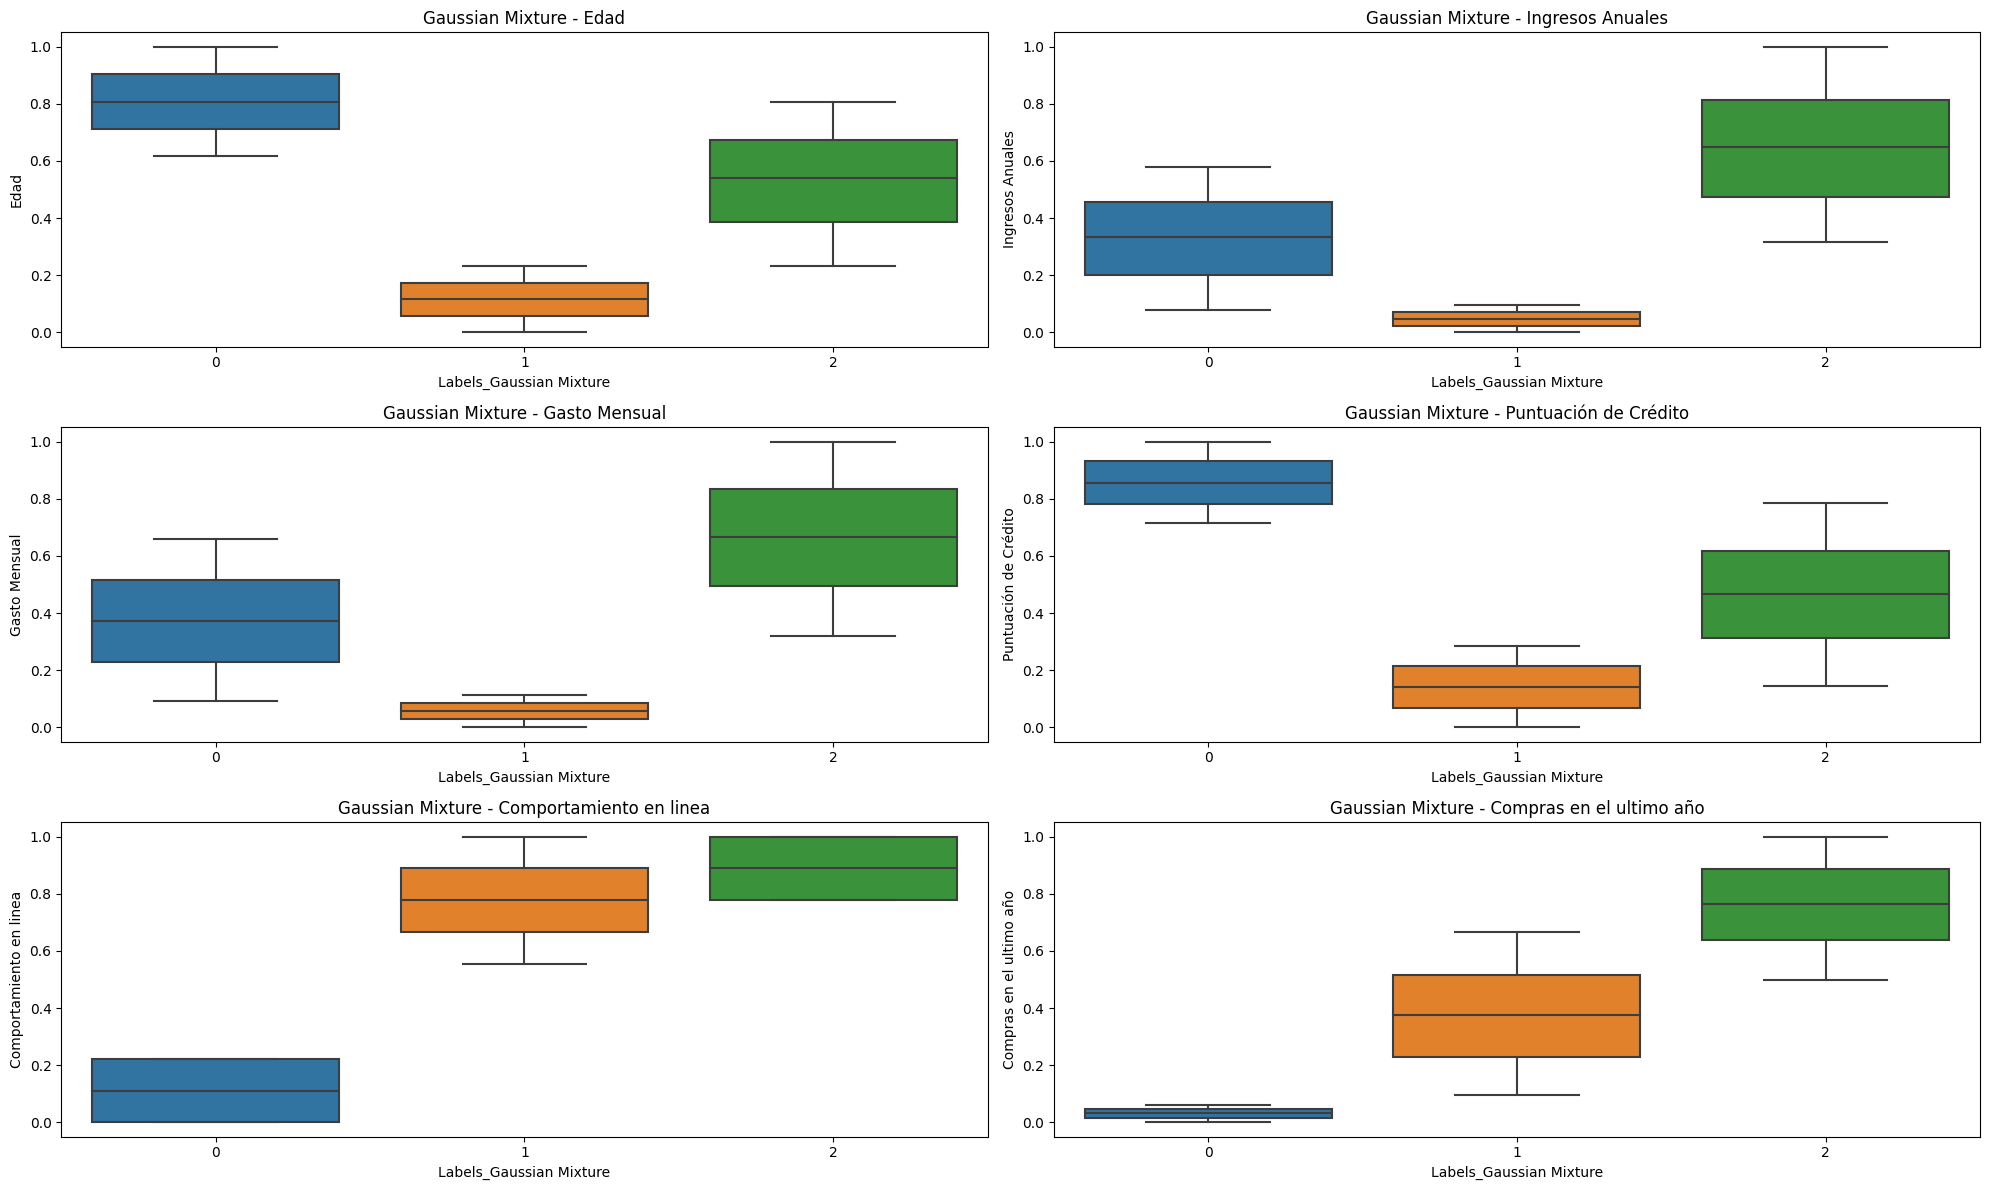

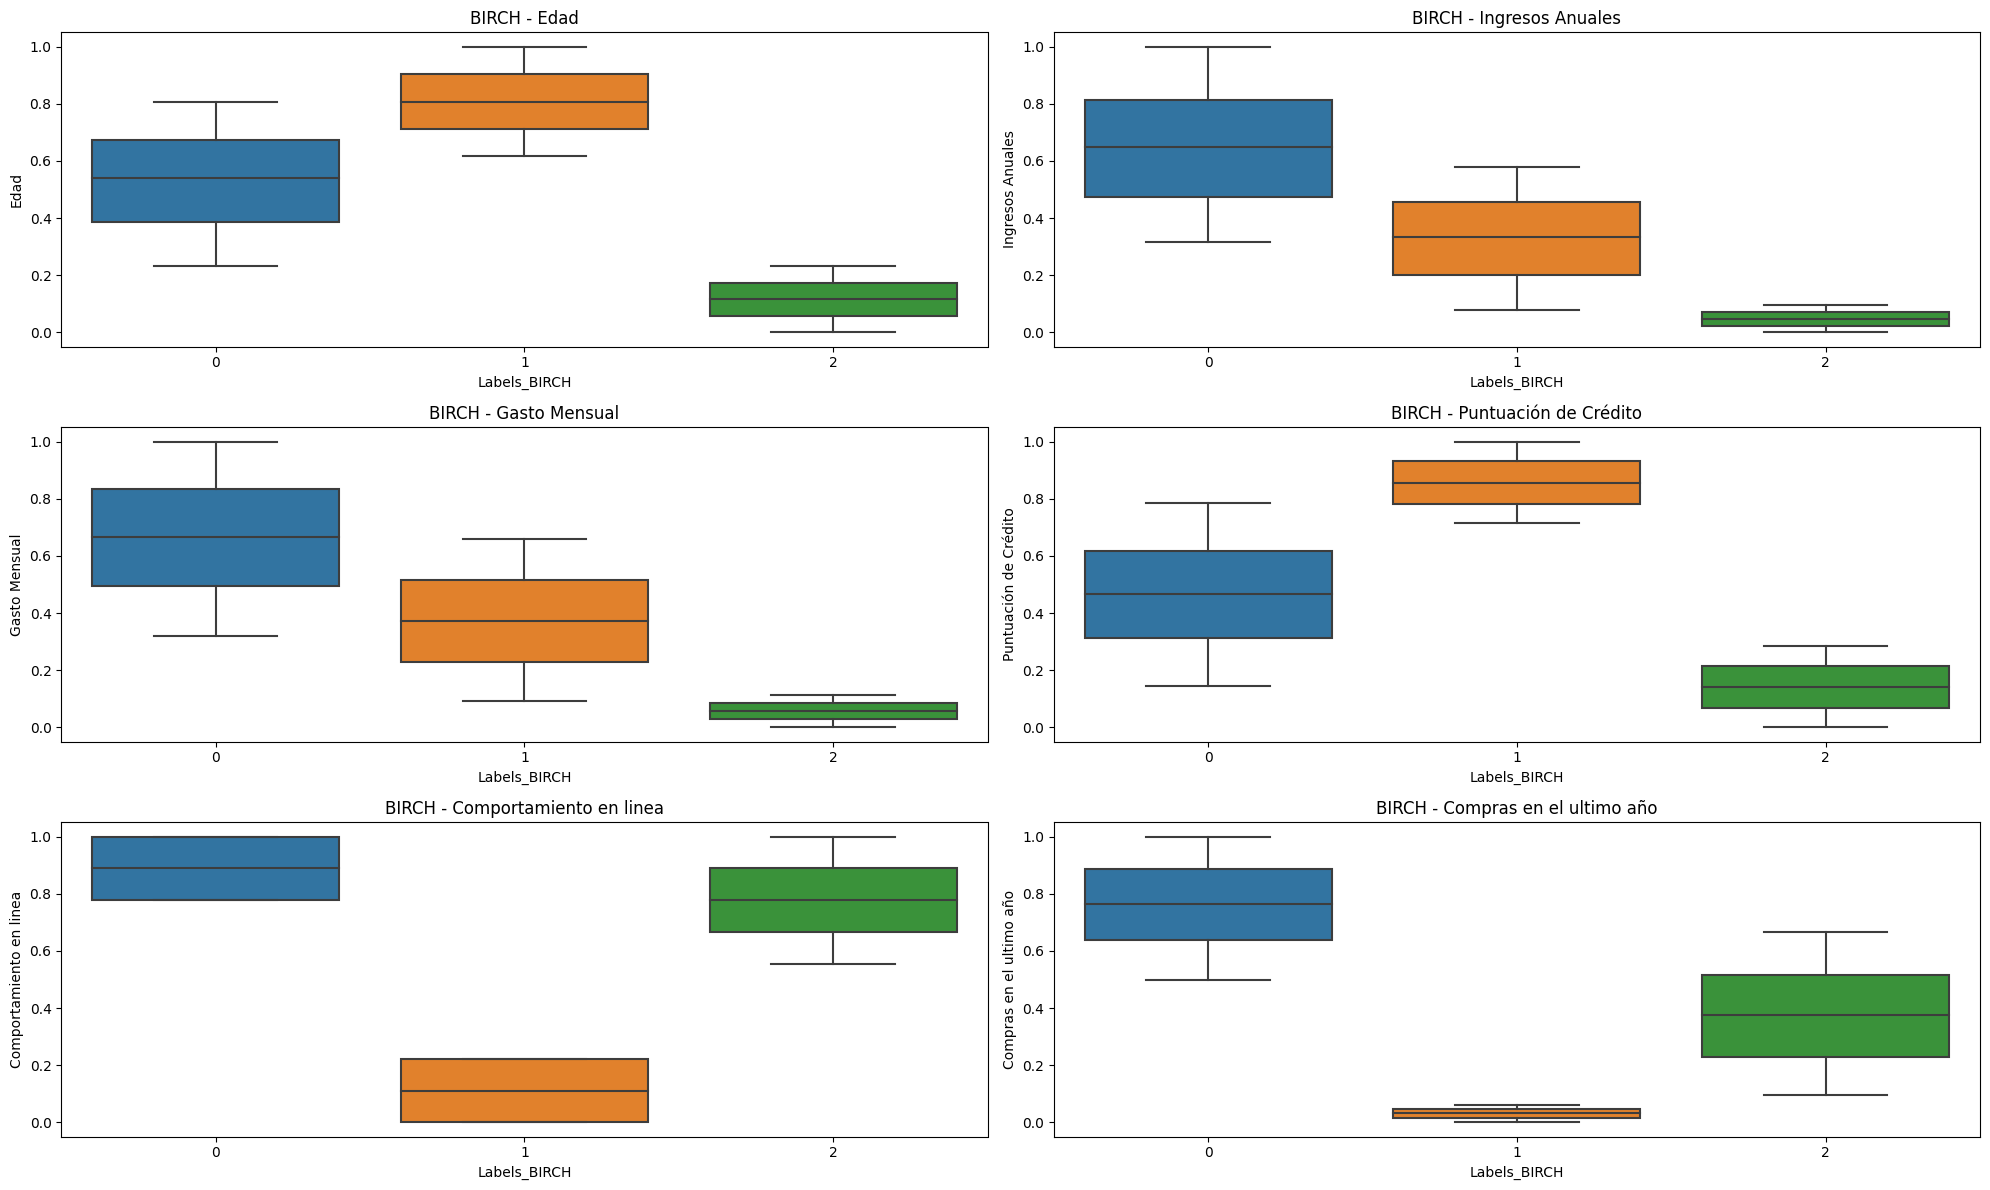

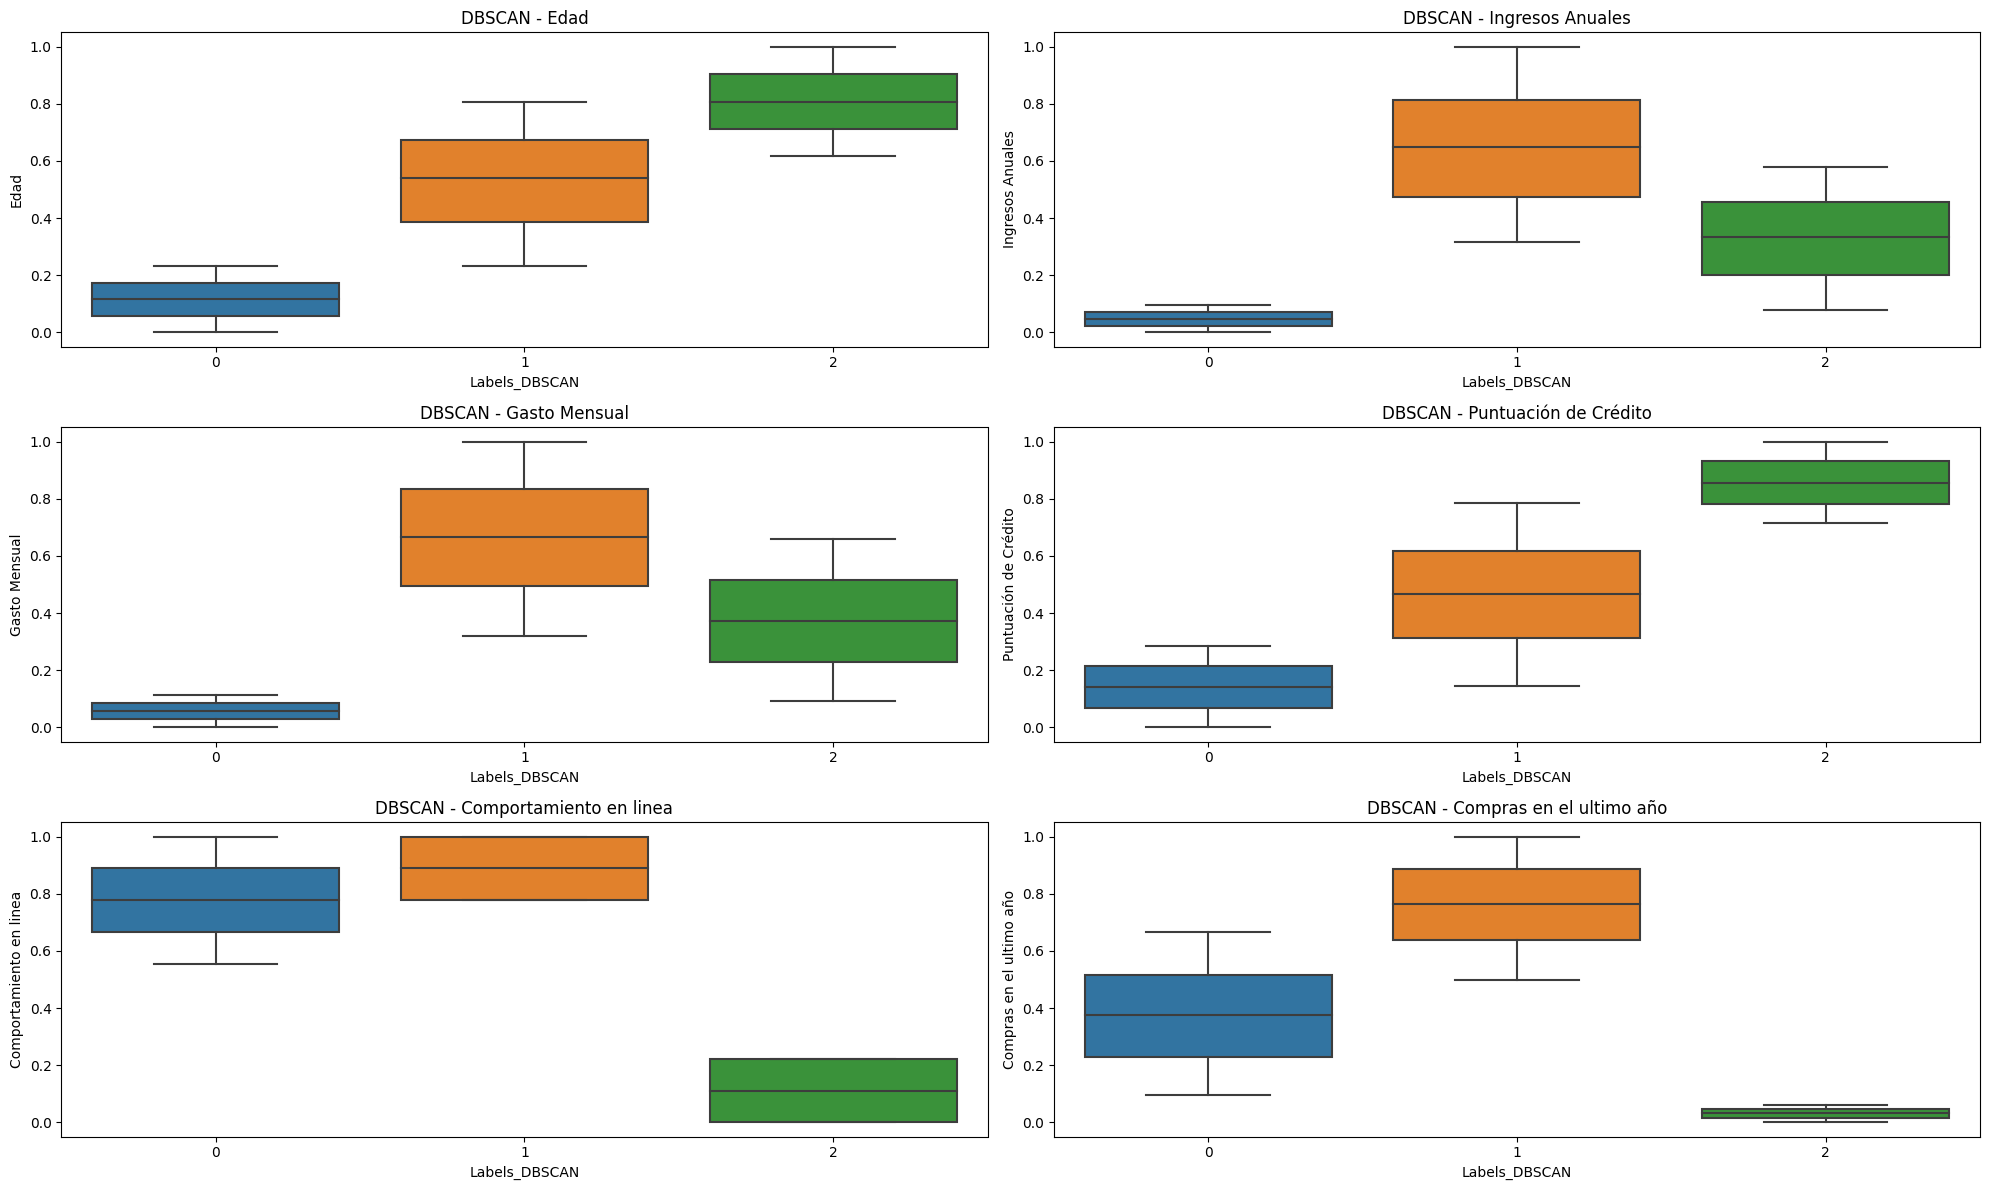

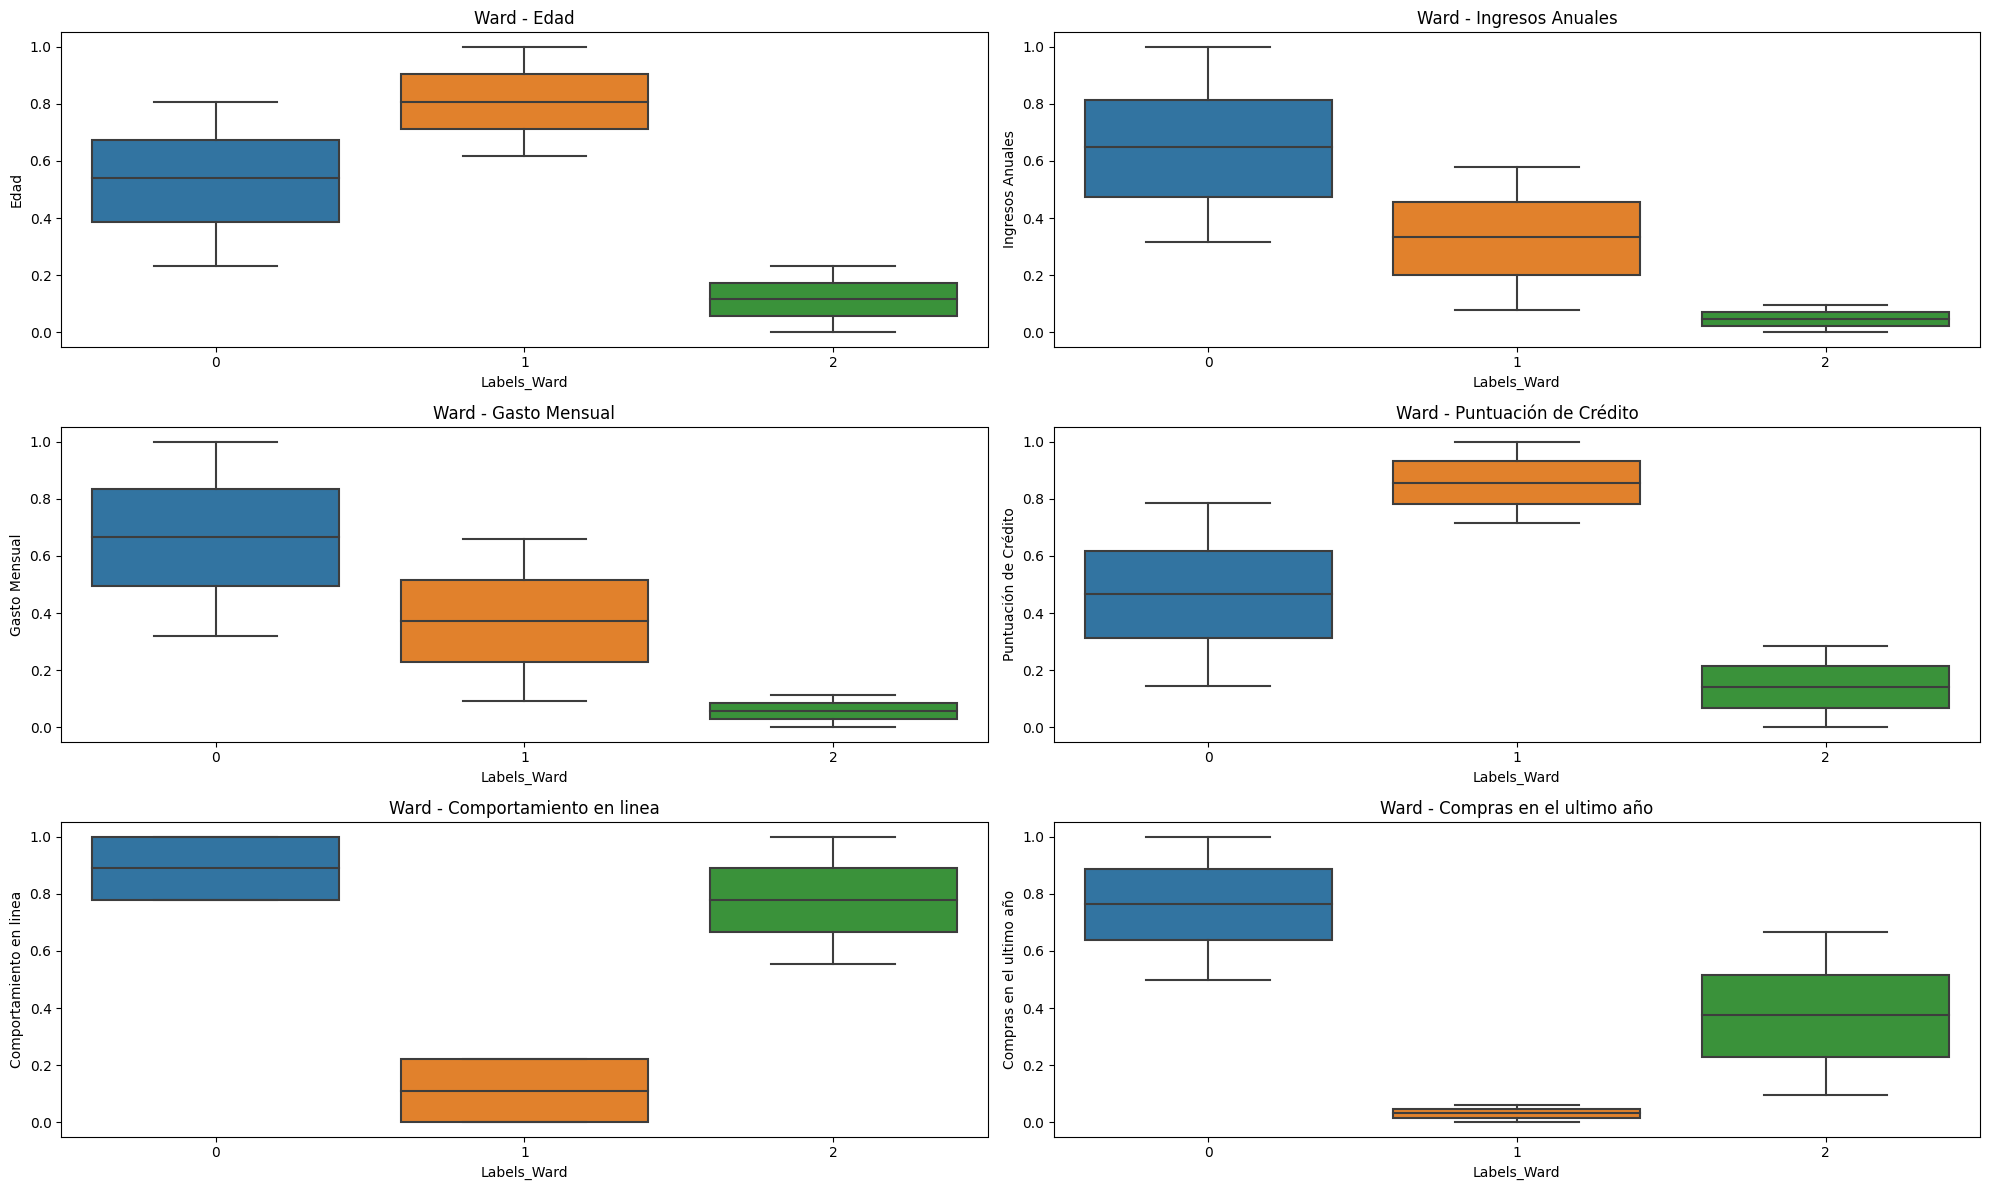

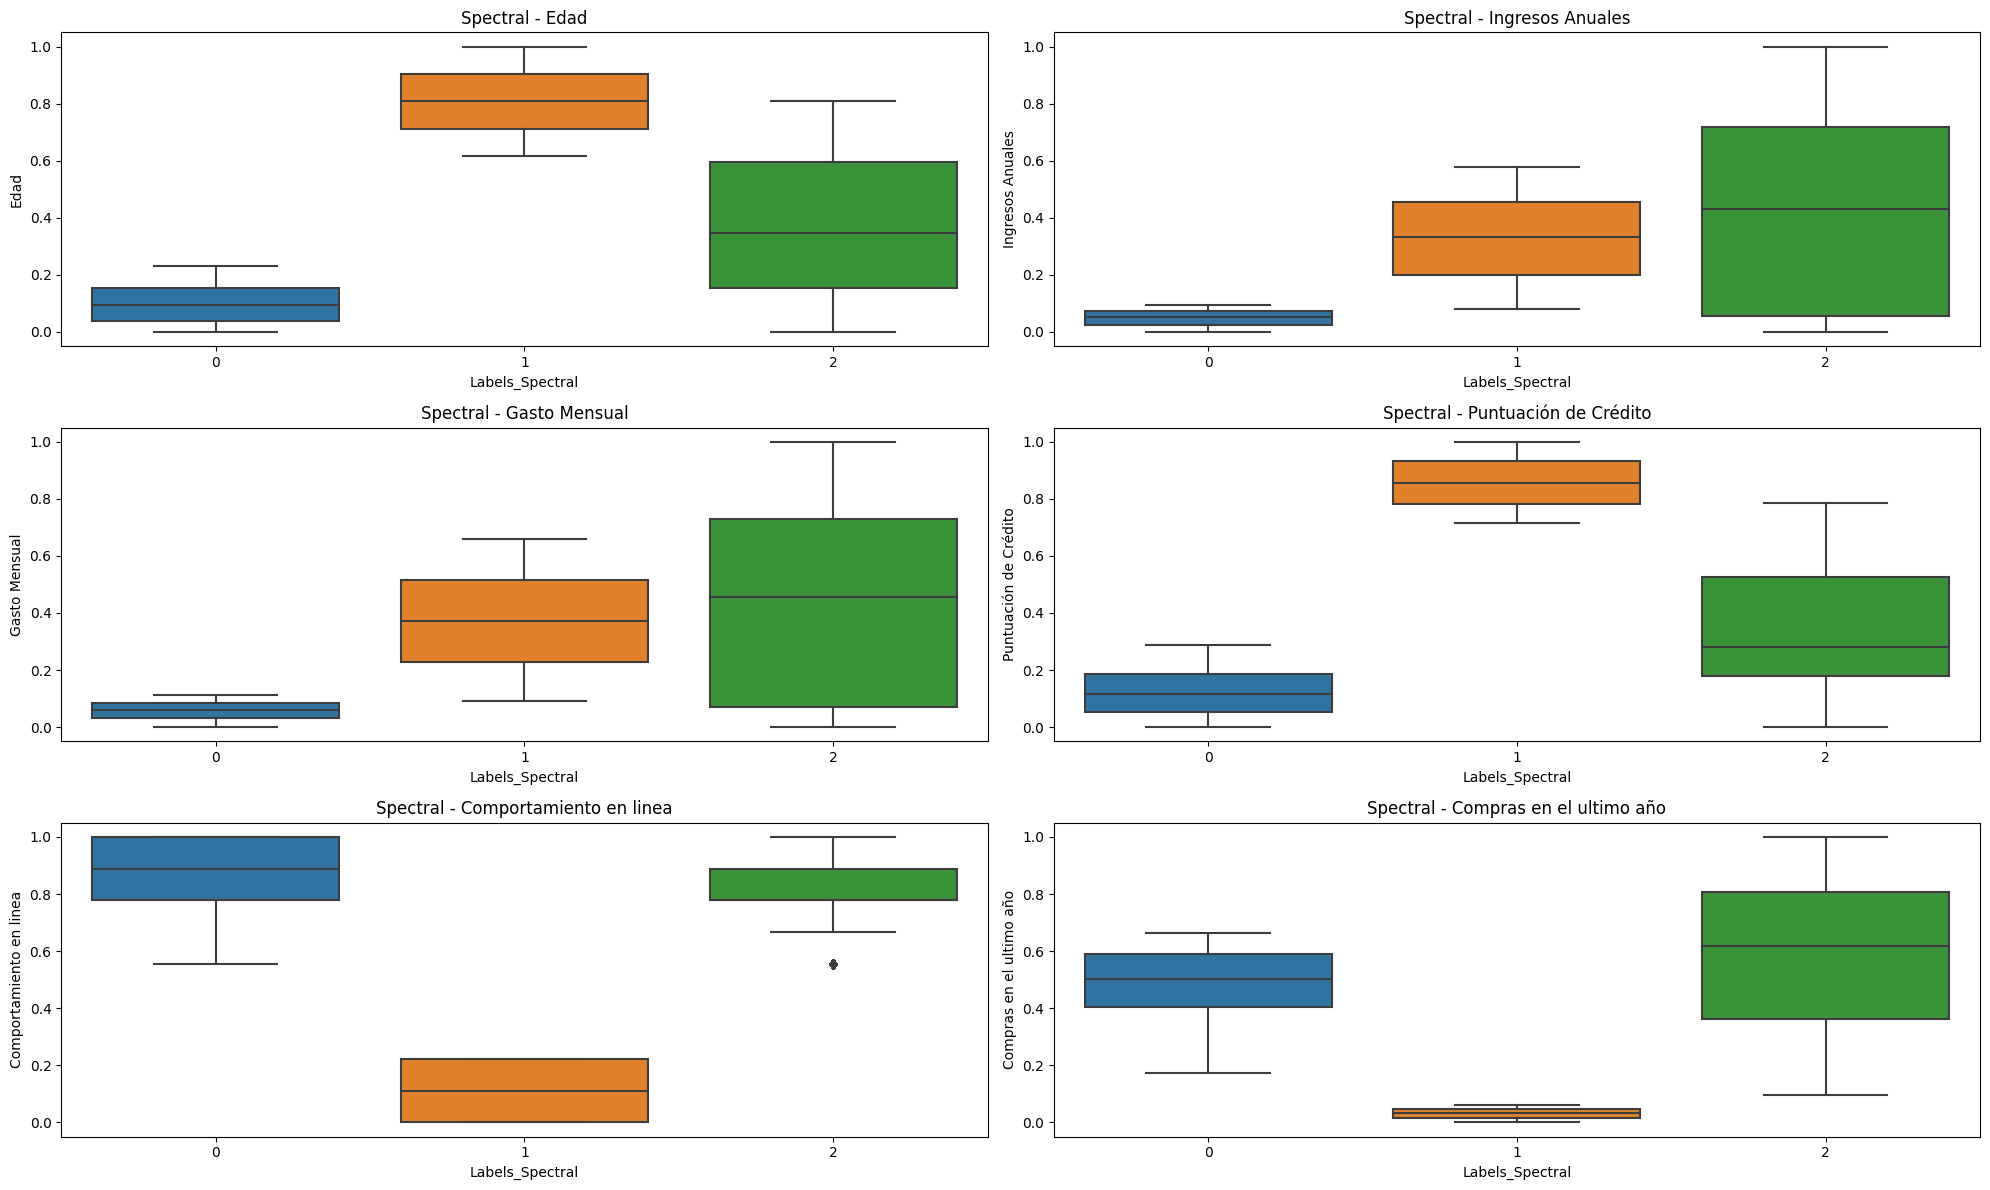

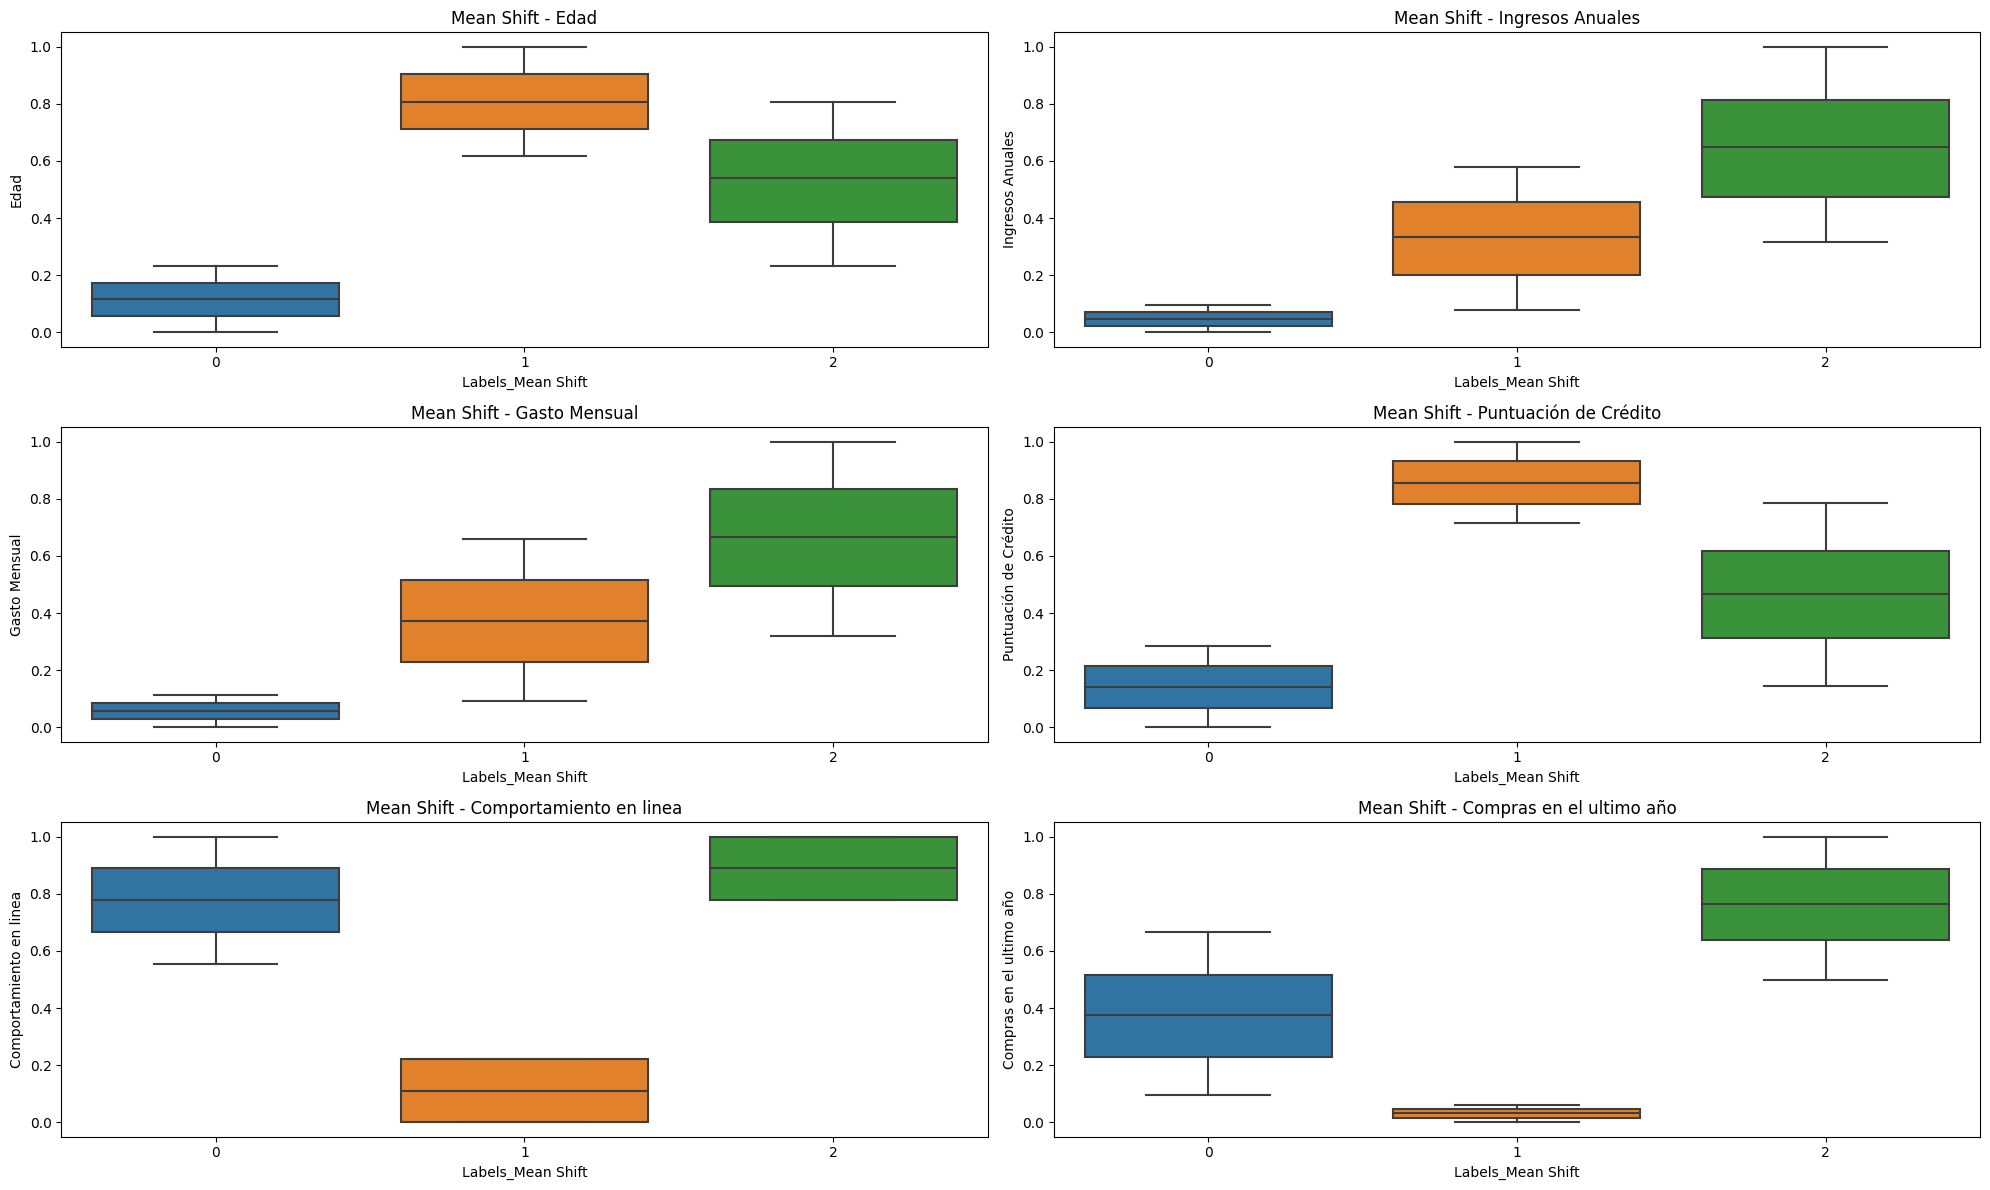

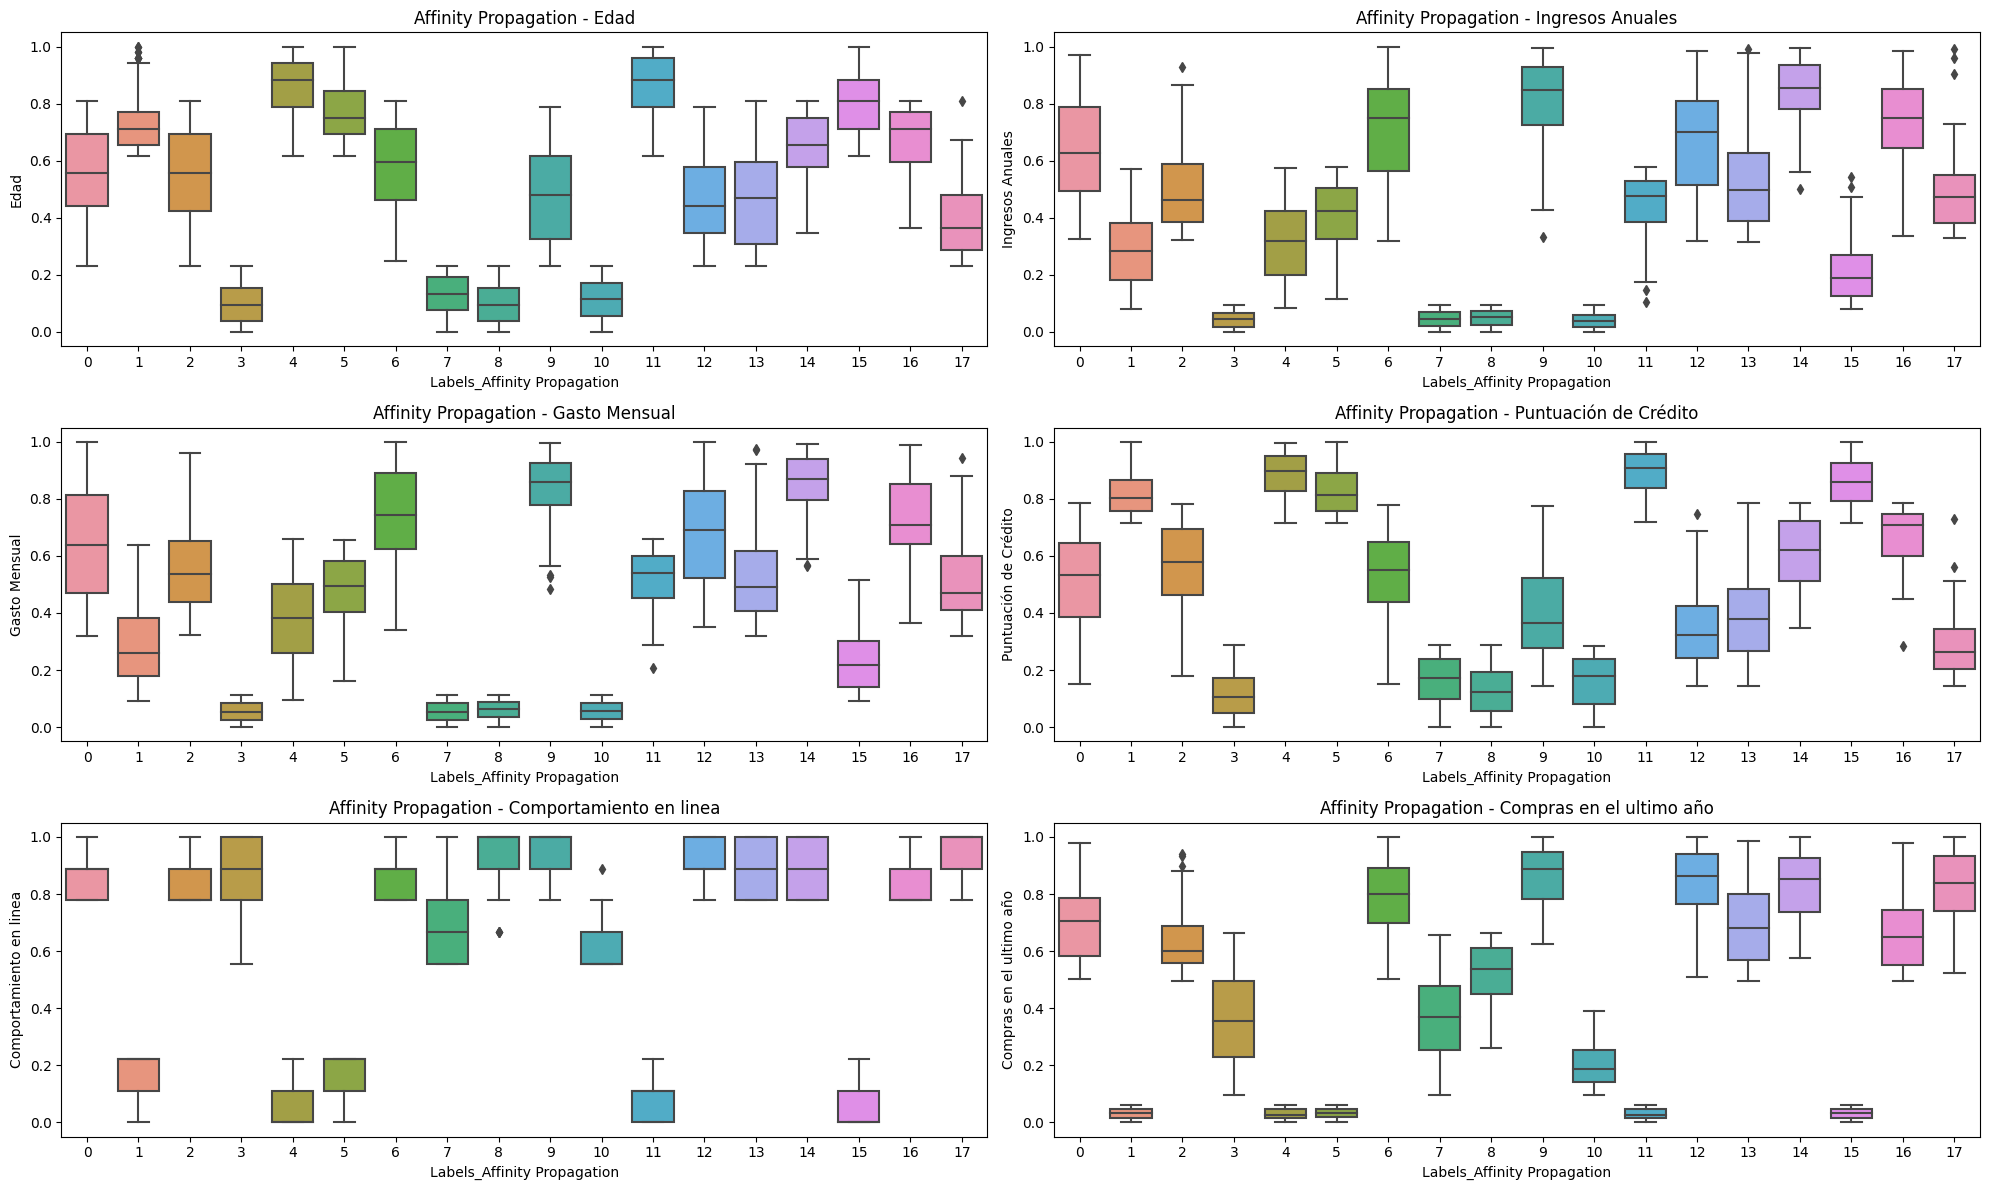

In [ ]:
le = LabelEncoder()


for name, model in models:
    if name == 'Gaussian Mixture':
        model.fit(X_reduced)
        labels = model.predict(X_reduced)
    else:
        labels = model.fit_predict(X_reduced)

    labels = le.fit_transform(labels)
    df_scaled[f'Labels_{name}'] = labels

# Generar boxplots para cada técnica de clustering y cada característica numérica
for name, _ in models:
    fig = plt.figure(figsize=(20, 12))
    for i, col in enumerate(numeric_columns_no_id, 1):
        ax = fig.add_subplot(len(numeric_columns_no_id)//2 + len(numeric_columns_no_id)%2, 2, i)
        sns.boxplot(x=f'Labels_{name}', y=col, data=df_scaled, ax=ax)
        ax.set_title(f'{name} - {col}')

    plt.tight_layout()
    plt.show()


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2c3340da-be44-447c-b509-9b133ff28053' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>